# Titanic Survival Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [313]:
test_data=pd.read_csv("tested.csv")
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [314]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [315]:
test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [316]:
#checking how many null values are in dataset
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [317]:
#dropping 'cabin' column
test_data=test_data.drop(['Cabin'],axis=1)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [318]:
test_data=test_data.rename(columns={"Sex":"Gender"})
test_data.head(9)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C


In [319]:
test_data.shape

(418, 11)

In [320]:
test_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Gender          0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [321]:
#filling null values on 'age' column by dummy values generated from mean
mean_age=int(test_data['Age'].mean())
std_age=int(test_data['Age'].std())
array=np.random.uniform(mean_age-std_age,mean_age+std_age,86)
array=np.round(array,1)
print(array)

[28.7 32.5 25.8 17.6 41.3 37.6 41.9 26.6 30.8 23.1 28.3 38.1 43.7 38.3
 30.5 29.4 32.2 34.2 36.5 39.  31.3 33.4 19.8 40.9 17.7 39.8 38.  39.6
 22.2 38.8 30.7 17.5 41.3 16.  44.  26.  38.3 42.5 41.3 33.  16.9 27.5
 32.6 28.5 25.7 24.1 37.  42.  24.4 24.5 33.  26.1 24.  22.3 23.1 25.
 37.3 42.8 32.9 17.4 31.5 18.6 24.5 21.4 17.5 34.8 30.3 33.6 25.  25.5
 39.4 34.5 25.2 40.9 35.  29.3 23.8 29.  23.8 16.2 32.7 19.6 38.7 37.7
 27.6 18.3]


In [322]:
#insert array into null values
test_data['Age'][test_data['Age'].isnull()]=array

C:\Users\mairah nisar\AppData\Local\Temp\ipykernel_27804\203652770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][test_data['Age'].isnull()]=array


In [323]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [324]:
mean=test_data['Fare'].mean()
test_data['Fare'].fillna(mean,inplace=True)
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [325]:
test_data['Gender']=test_data['Gender'].replace({'male':0,'female':1})

test_data['Embarked']=test_data['Embarked'].replace({'Q':0,'S':1,'C':3})
test_data.head(8)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,1
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,0
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,1


[Text(0, 0, '0'), Text(1, 0, '1')]

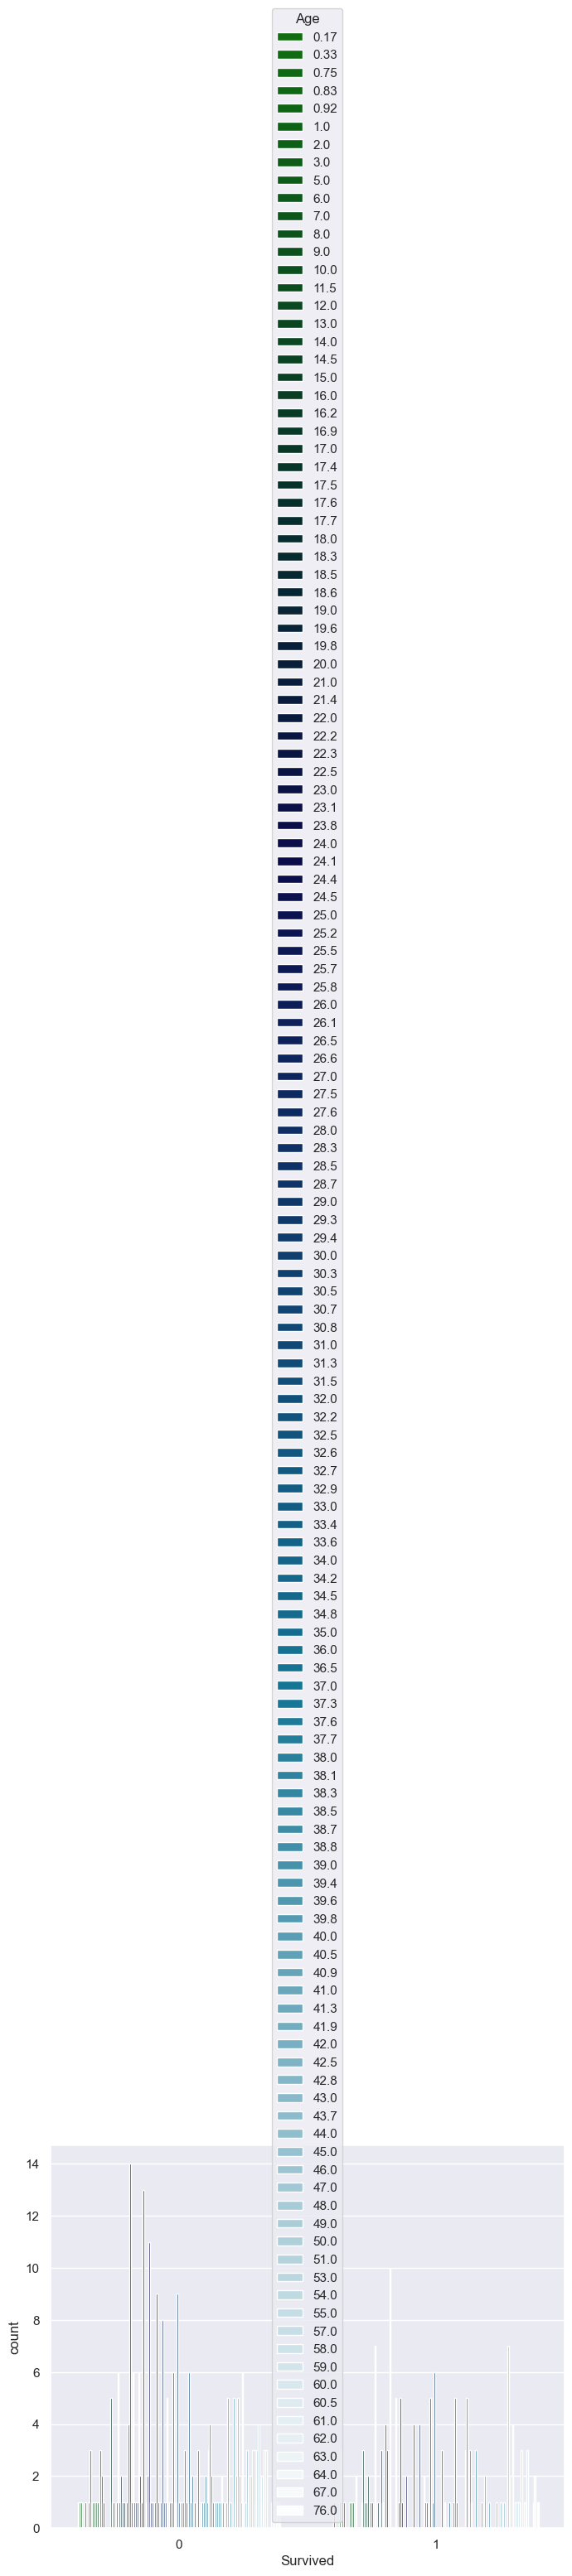

In [326]:
sur_pclass = sns.countplot(x='Survived',hue='Age',data=test_data,palette='ocean')
sur_pclass.set_xticklabels(sur_pclass.get_xticklabels())



In [327]:
data=[test_data]
for dataset in data:
    dataset['Age']= dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=5,'Age']=0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 10), 'Age'] = 1
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=18),'Age']= 2
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22),'Age']=3
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 25), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30),'Age'] =5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 46), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 46) & (dataset['Age'] <= 52), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 52) & (dataset['Age'] <= 60), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 66), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 66) & (dataset['Age'] <= 72), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 80), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 80), 'Age'] = 12
    
test_data['Age'].value_counts()

6     124
5      73
4      54
3      51
2      45
8      20
7      19
0      12
1      10
9       8
10      1
11      1
Name: Age, dtype: int64

In [328]:
test_data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,6,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,7,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,9,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,5,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,1,1,3101298,12.2875,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,6,0,0,A.5. 3236,8.0500,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,6,0,0,PC 17758,108.9000,3
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,6,0,0,SOTON/O.Q. 3101262,7.2500,1
416,1308,0,3,"Ware, Mr. Frederick",0,5,0,0,359309,8.0500,1


FEATURE SELECTION

C:\Users\mairah nisar\AppData\Local\Temp\ipykernel_27804\407388859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),annot=True,cmap="BrBG")


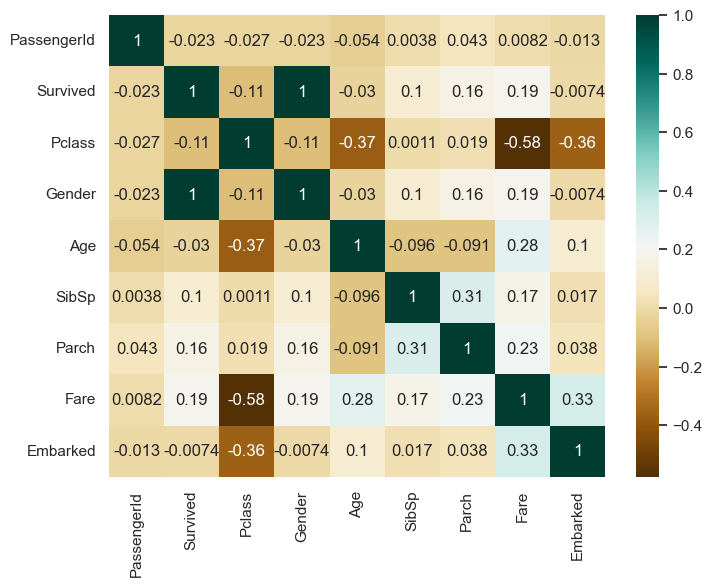

In [329]:
sns.heatmap(test_data.corr(),annot=True,cmap="BrBG")
plt.show()

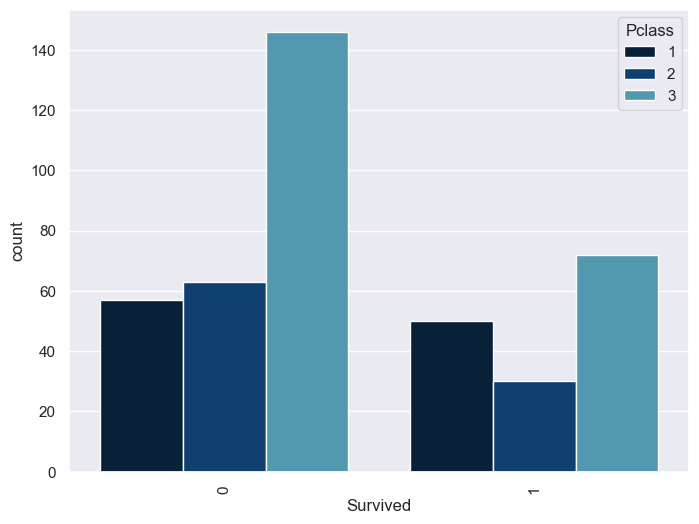

In [330]:
sur_pclass = sns.countplot(x='Survived',hue='Pclass',data=test_data,palette='ocean')
sur_pclass.set_xticklabels(sur_pclass.get_xticklabels(),rotation=90)

sns.set(rc={'figure.figsize':(8,6)})

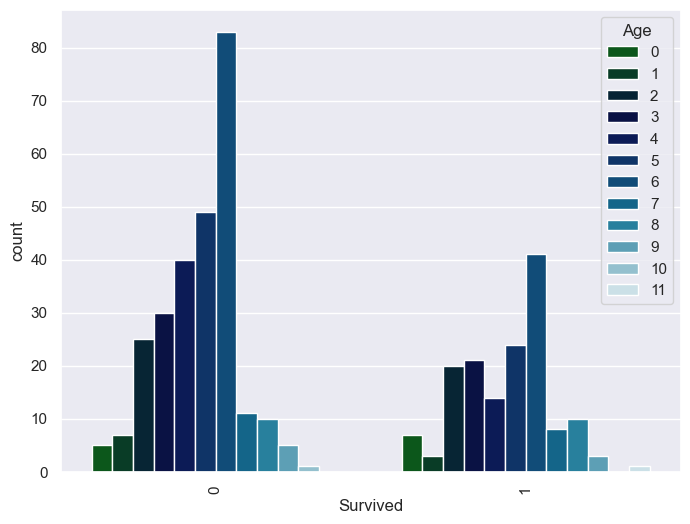

In [331]:
sur_pclass = sns.countplot(x='Survived',hue='Age',data=test_data,palette='ocean')
sur_pclass.set_xticklabels(sur_pclass.get_xticklabels(),rotation=90)

sns.set(rc={'figure.figsize':(8,6)})

In [332]:
test_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [333]:
test_data.groupby(['Fare'])['Survived'].mean()

Fare
0.0000      0.0
3.1708      0.0
6.4375      0.0
6.4958      0.0
6.9500      1.0
           ... 
227.5250    0.0
247.5208    1.0
262.3750    0.6
263.0000    1.0
512.3292    1.0
Name: Survived, Length: 170, dtype: float64

In [334]:
test_data.groupby(['Parch'])['Survived'].mean()

Parch
0    0.305556
1    0.538462
2    0.606061
3    0.666667
4    1.000000
5    0.000000
6    0.000000
9    0.500000
Name: Survived, dtype: float64

In [335]:
tab = pd.crosstab(test_data['Pclass'], test_data['Gender'])
print (tab)

Gender    0   1
Pclass         
1        57  50
2        63  30
3       146  72


In [336]:
test_data.groupby(['Gender'])['Survived'].mean()

Gender
0    0.0
1    1.0
Name: Survived, dtype: float64

In [337]:
test_data.groupby(['Age'])['Survived'].mean()

Age
0     0.583333
1     0.300000
2     0.444444
3     0.411765
4     0.259259
5     0.328767
6     0.330645
7     0.421053
8     0.500000
9     0.375000
10    0.000000
11    1.000000
Name: Survived, dtype: float64

In [338]:
test_data['Age']

0      6
1      7
2      9
3      5
4      3
      ..
413    6
414    6
415    6
416    5
417    2
Name: Age, Length: 418, dtype: int32

In [339]:
test_data.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,6,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,7,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,9,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,5,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,1,1,3101298,12.2875,1
5,897,0,3,"Svensson, Mr. Johan Cervin",0,2,0,0,7538,9.2250,1
6,898,1,3,"Connolly, Miss. Kate",1,5,0,0,330972,7.6292,0
7,899,0,2,"Caldwell, Mr. Albert Francis",0,5,1,1,248738,29.0000,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,2,0,0,2657,7.2292,3
9,901,0,3,"Davies, Mr. John Samuel",0,3,2,0,A/4 48871,24.1500,1


In [340]:
#dropping unecessary columns
test_data= test_data.drop(['Name','Ticket','Fare','Embarked','SibSp','Parch','Age'],axis=1)
test_data

,PassengerId,Survived,Pclass,Gender
0,892,0,3,0
1,893,1,3,1
2,894,0,2,0
3,895,0,3,0
4,896,1,3,1
...,...,...,...,...
413,1305,0,3,0
414,1306,1,1,1
415,1307,0,3,0
416,1308,0,3,0


In [341]:
#storing values of passenger id for later use. the final result must have passengeraID
passenger=test_data['PassengerId'].values

In [342]:
test_data=test_data.drop(['PassengerId'],axis=1)
test_data.head(5)

,Survived,Pclass,Gender
0,0,3,0
1,1,3,1
2,0,2,0
3,0,3,0
4,1,3,1


applying classification algorithm 

In [522]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [583]:
X=test_data.iloc[:,1:].values
y=test_data.iloc[:,0].values

In [584]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [585]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_features=4)

In [586]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_features=4)

In [587]:
y_pred=classifier.predict(X_train)

In [588]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_train)

1.0

In [589]:
xf=test_data.iloc[:,1:3].values

In [590]:
test_data.shape

(418, 3)

In [591]:
y_final=classifier.predict(xf)

In [592]:
y_final.shape

(418,)

In [593]:
y_final

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [594]:
result=pd.DataFrame()

In [595]:
result['PassengerId']=passenger
result['survived']=y_final

In [596]:
result.to_csv('sample.csv',index=False)